In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [3]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [4]:
y_train.shape, x_test.shape

((60000,), (10000, 28, 28))

In [5]:
x_train.min(), x_train.max()

(0, 255)

In [6]:
y_train.min(), y_train.max()

(0, 9)

In [7]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [8]:
x_train.min(), x_train.max()

(0.0, 1.0)

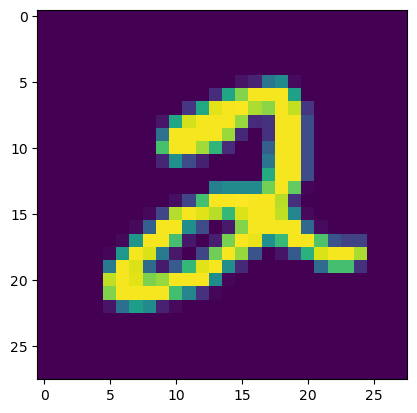

In [9]:
plt.imshow(x_train[5])

In [10]:
y_train[5]

2

In [11]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(units=128, activation='relu', return_sequences=True, input_shape=(28,28)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(units=128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=32, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 28, 128)           80384     
_________________________________________________________________
dropout (Dropout)            (None, 28, 128)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                4128      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3

In [13]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 115s 60ms/step - loss: 0.6277 - accuracy: 0.7983 - val_loss: 0.1649 - val_accuracy: 0.9486
Epoch 2/10
1875/1875 [==============================] - 121s 65ms/step - loss: 0.1905 - accuracy: 0.9491 - val_loss: 0.1336 - val_accuracy: 0.9626
Epoch 3/10
1875/1875 [==============================] - 115s 61ms/step - loss: 0.1087 - accuracy: 0.9710 - val_loss: 0.0811 - val_accuracy: 0.9761
Epoch 4/10
1875/1875 [==============================] - 115s 62ms/step - loss: 0.0876 - accuracy: 0.9768 - val_loss: 0.0628 - val_accuracy: 0.9830
Epoch 5/10
1875/1875 [==============================] - 115s 62ms/step - loss: 0.0757 - accuracy: 0.9802 - val_loss: 0.0609 - val_accuracy: 0.9840
Epoch 6/10
1875/1875 [==============================] - 118s 63ms/step - loss: 0.0622 - accuracy: 0.9833 - val_loss: 0.0492 - val_accuracy: 0.9853
Epoch 7/10
1875/1875 [==============================] - 118s 63ms/step - loss: 0.0580 - accuracy: 0.9849 - val_loss: 0

In [15]:
y_classes = model.predict(x_test)
y_pred = np.argmax(y_classes, axis=1)

In [16]:
print(y_pred[0]), print(y_test[0])

7
7


(None, None)

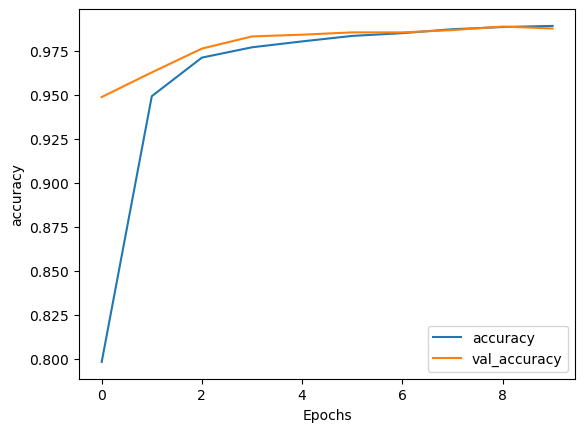

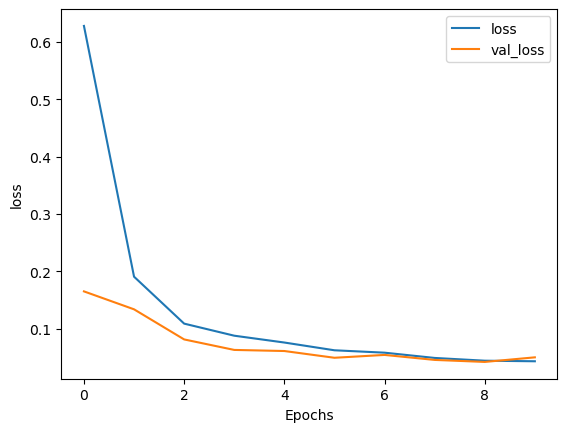

In [17]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")